<a href="https://colab.research.google.com/github/NusratBegum/Machine-Learning/blob/main/Machine_Learning_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.1
Continuing from homework 1, use the ‘Salary’ dataset from Kaggle and ‘ext1data.txt’ dataset from Andrew Ng’s Exercise 1 and perform simple linear regression. Modify the gradient descent function such that it supports ridge regression.

See guideline from Andrew Ng’s code (Exercise 5 - Python)
https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/blob/master/Exercises/Assignment%205%20-%20%20Regularized%20Linear%20Regression%20and%20Bias%20v.s.%20Variance/ex5%20-%20Python/Exercise%205%20-%20Regularized%20Linear%20Regression.ipynb

Salary Dataset:
https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

Submit your .ipynb file to show your work.

In [34]:
# We want to make sure that our python environment installs the opendatasets library to use it as import module.
# Using Python Package Installer (pip) to make sure we install this in the environment first
!pip install opendatasets --upgrade --quiet

# Importing Important Libraries
import opendatasets as od # opendatasets for downloading kaggle datasets
import pandas as pd # for data structuring and data analysis tools
import numpy as np # # Scientific and vector computation for python
import matplotlib.pyplot as plt #2-d plotting
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy.io import loadmat
from scipy.optimize import minimize
import statistics as stat
import sympy
from mpl_toolkits.mplot3d import axes3d # 3 d plots
import seaborn as sns # statistical data visualisation
from sympy.abc import theta

In [35]:
# opendatasets library will downlod a .zip file and unzip it
od.download("https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression")
# declare the directory where the data will be download in colab
data_path = "/content/salary-dataset-simple-linear-regression"
# Pandas Reading the csv file
df = pd.read_csv(data_path + "/Salary_dataset.csv")
# Checking first few rows
df.head()

Skipping, found downloaded files in "./salary-dataset-simple-linear-regression" (use force=True to force download)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [36]:
# We do not need first column as it only shows index number
df = df.iloc[:, 1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Linear Regression with one Variable (Gradient Descent)

Number of training examples (m): 30
Number of features (n): 2


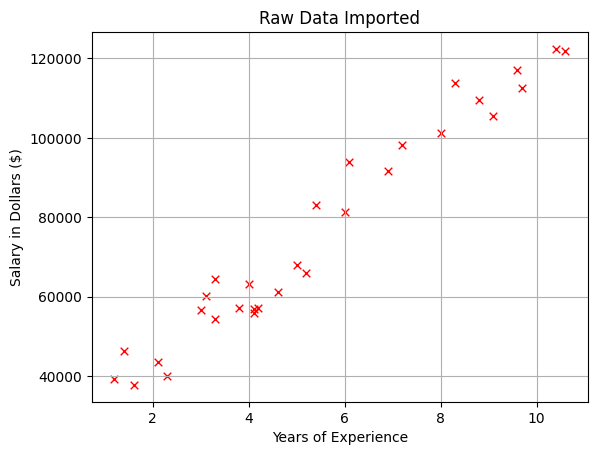

In [37]:
# Converting into Numpy Arrays
data = df.to_numpy()

#Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.
X = np.c_[np.ones(len(data)),data[:,0]]

y = np.c_[data[:,1]] # set y data to the second imported column
m, n = X.shape # m as rows/dimensions/features, n as columns/sample/record/observations

# print('Number of features (n): %.0f'%(n))
print('Number of training examples (m): %.0f'%(m))
print('Number of features (n): %.0f'%(n))


# Create a Scatter Plot of the data by using Matplotlib to see the Data Distribution or Spread
# Creating our X axis as YearsExperience column and Y axis as Salary Column
%matplotlib inline
plt.figure()
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Years of Experience')  # Corrected label
plt.ylabel('Salary in Dollars ($)')  # Corrected label
plt.title('Raw Data Imported')
plt.grid(True)
plt.show()

## Linear Regression with one Variable (Gradient Descent)

Hypothesis:
$ h_\theta (x) = \theta_0 + \theta_1 x $

Parameters/Features:
$\theta_0 $, $\theta_1$

m = number of training examples <br>
n = number of features <br>
i = interation of training examples <br>
j = iterations of features<br>
$\alpha$ = learnign rate

The objective of linear regression is to minimize the cost function which is given by
Cost Function (J):
$$J(\theta_0, \theta_1) = \frac{1}{(2m)}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2}$$
where the hypothesis is given by a linear model:
$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

Algorithm: Gradient descent. In batch gradient descent, each iteration performs the update and repeats until Convergence (updating parameters simultaneously)

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr)$$
where <br>
for j = 0    
$$\frac{\partial}{\partial \theta_0} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)$$<br>
for j = 1,2,3...n        
$$\frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)x^{(i)}$$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

### Initialisation of Gradient Descent

In [38]:
#Inialize each of the two model parameters to zero.
theta_gd=[[0],[0]]

# computre the cost function for a given
def computeCost(X, y, theta_gd):
    """
    Compute cost for linear regression. Computes the cost of using theta_gd as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already
        appended to the features so we have n+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).

    theta_gd : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    J = 0
    hypoth = X.dot(theta_gd) # determin the hypothesis
    J = 1 / (2 * m) * np.sum(np.square(hypoth - y)) # determine the cost function

    return(J) # return the cost function

### Implemet Gradient descent


The parameter values for minimised cost function:
	θ_0: 24472.969764
	θ_1: 9505.034359


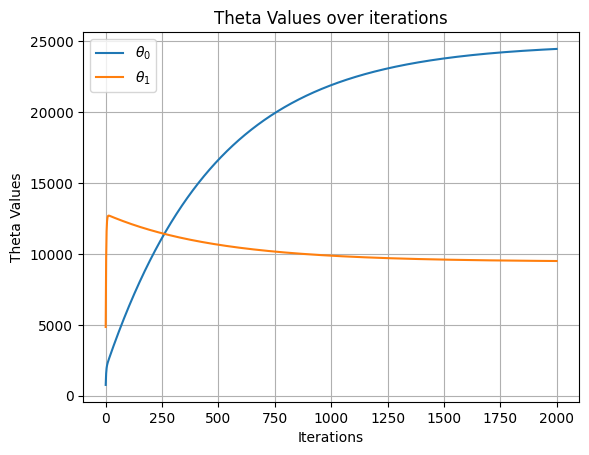

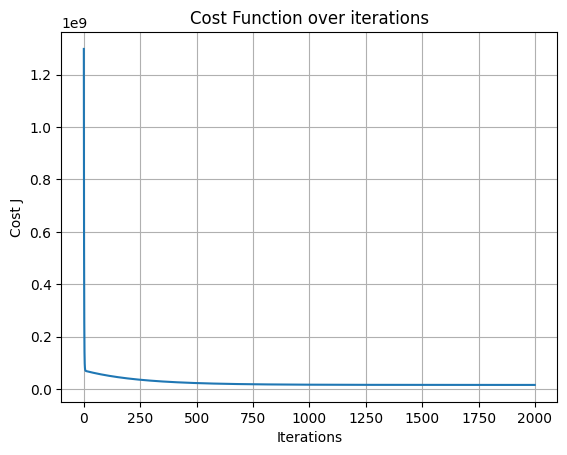

In [39]:
alpha = 0.01 #define the learning rate
num_iters = 2000 # define the number of iterations of gradient descent
x_scale = np.arange(num_iters)

def gradientDescent(X, y, theta_gd, alpha, num_iters):
    """
    Performs gradient descent to learn 'theta_gd'. Updates theta by taking 'num_iters'
    gradient steps with learning rate 'alpha'.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : arra_like
        Value at given features. A vector of shape (m, ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, ).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).

    J_history : list
        A python list for the values of the cost function after each iteration.

    """
    theta_gd_history = np.zeros((num_iters, 2))
    J_history = np.zeros((num_iters))

    for iter in np.arange(num_iters): #gradient descent iteration loop

        hypoth = X.dot(theta_gd) # determine the hypothesis for the current value of thetas
        dJ_theta_gd  = (1/m) * (X.T.dot(hypoth - y)) # Determine derivative of cost function
        theta_gd = theta_gd - alpha * dJ_theta_gd #calculate new values of theta

        # store calculated values of theta
        theta_gd_history[iter][0] = theta_gd[0]
        theta_gd_history[iter][1] = theta_gd[1]

        J_history[iter] = computeCost(X, y, theta_gd) #calclate the cost fucntion

    return(theta_gd, J_history, theta_gd_history) # return final theta and the list of cost function results

# run gradient descent to return final theta for minimum cost funtiona as well as all the cost function values
#calculated (for each iteration)
theta_gd, J_history, theta_gd_history = gradientDescent(X, y, theta_gd, alpha, num_iters)
print('\nThe parameter values for minimised cost function:')
print('\t%s_0: %f' %(sympy.pretty(theta),theta_gd[0]))
print('\t%s_1: %f' %(sympy.pretty(theta), theta_gd[1]))

# plot theta values as a function of iterations of gradient descent
%matplotlib inline
plt.figure()
plt.plot(x_scale, theta_gd_history)
plt.ylabel('Theta Values')
plt.xlabel('Iterations');
plt.title('Theta Values over iterations')
plt.grid(True)
plt.legend([r'$\theta_0$', r'$\theta_1$'])

# plot cost function histtory as a function of iterations of gradient descent
plt.figure()
plt.plot(x_scale, J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.title('Cost Function over iterations')
plt.grid(True)

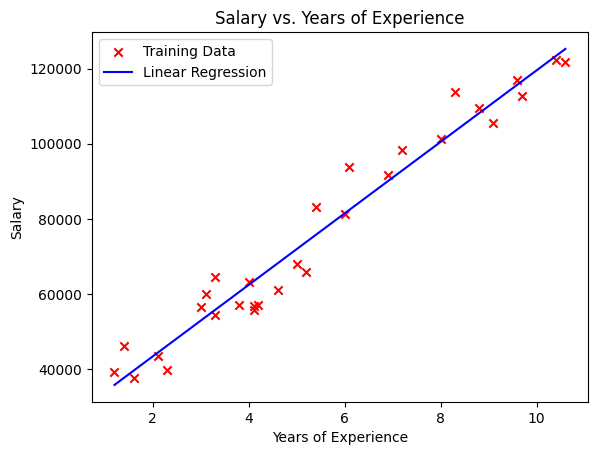

In [40]:
# Plot the Predicted Value in Scatter
plt.scatter(X[:,1], y, color='red', marker='x', label='Training Data')
plt.plot(X[:,1], X.dot(theta_gd), color='blue', label='Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.legend()
plt.show()

### Compare Gradient Descent and sklearn

In [41]:
# detertine the y values according to the theta values from gradient descent
y_gd = X.dot(theta_gd)
# determine the r^2 value
from sklearn.metrics import r2_score
r2_gd = r2_score(y, y_gd) # Comparing Original y and y_gd

# determine the fit using linear regression classifier from sklearn
from sklearn.linear_model import LinearRegression # data classification, regeression, clustering etc
lr_regr = LinearRegression()
lr_regr.fit(X[:,1].reshape(-1,1), y.ravel())
theta_lr = np.zeros(2)
theta_lr[0] = lr_regr.intercept_
theta_lr[1] = lr_regr.coef_
y_lr = lr_regr.predict(X[:,1].reshape(-1,1))
r2_lr = r2_score(y, y_lr) # Comparing Original y and y_lr

print('Goodness of fit for Gradient Descent r^2: %.3f' % (r2_gd))
print('Goodness of fit for Scikit-learn linear model r^2: %.3f' % (r2_lr))

Goodness of fit for Gradient Descent r^2: 0.957
Goodness of fit for Scikit-learn linear model r^2: 0.957


### Prediction

In [42]:
# Predict the Salary from 5 Years of Experience and 10 Years of Experience

# Predict Salary for 5 years of experience
years_experience_5 = 5.0
predicted_salary_5_gd = np.dot([1, years_experience_5], theta_gd)
predicted_salary_5_lr = lr_regr.predict([[years_experience_5]])

print("Predicted Salary for {:.2f} years of experience using Gradient Descent: ${:.2f}".format(years_experience_5, predicted_salary_5_gd.item()))
print("Predicted Salary for {:.2f} years of experience using Scikit-learn Linear Regression: ${:.2f}".format(years_experience_5, predicted_salary_5_lr.item()))

# Predict Salary for 10 years of experience
years_experience_10 = 10.0
predicted_salary_10_gd = np.dot([1, years_experience_10], theta_gd)
predicted_salary_10_lr = lr_regr.predict([[years_experience_10]])

print("\nPredicted Salary for {:.2f} years of experience using Gradient Descent: ${:.2f}".format(years_experience_10, predicted_salary_10_gd.item()))
print("Predicted Salary for {:.2f} years of experience using Scikit-learn Linear Regression: ${:.2f}".format(years_experience_10, predicted_salary_10_lr.item()))

Predicted Salary for 5.00 years of experience using Gradient Descent: $71998.14
Predicted Salary for 5.00 years of experience using Scikit-learn Linear Regression: $72098.02

Predicted Salary for 10.00 years of experience using Gradient Descent: $119523.31
Predicted Salary for 10.00 years of experience using Scikit-learn Linear Regression: $119347.83


### Summary of results

-----------------------------------------------------------------
			FITING RESULTS GRADIENT DESCENT
-----------------------------------------------------------------

Fitting: GRADIENT DESCENT
Learning rate (alpha): 0.01
Number of iterations: 2000
Fitting parameters:
	Intercept θ_0: 24472.970
	Slope θ_1: 9505.034
Goodness of fit r^2: 0.957
Predicted Salary for 5.00 years of experience using Gradient Descent: $71998.14
Predicted Salary for 10.00 years of experience using Gradient Descent: $119523.31
-----------------------------------------------------------------
			FITING RESULTS SKLEARN
-----------------------------------------------------------------

Fitting: Linear Regression SKLEARN
Fitting parameters:
	Intercept θ_0: 24848.204
	Slope θ_1: 9449.962
Goodness of fit r^2: 0.957
Predicted Salary for 5.00 years of experience using Scikit-learn Linear Regression: $72098.02
Predicted Salary for 10.00 years of experience using Scikit-learn Linear Regression: $119347.83


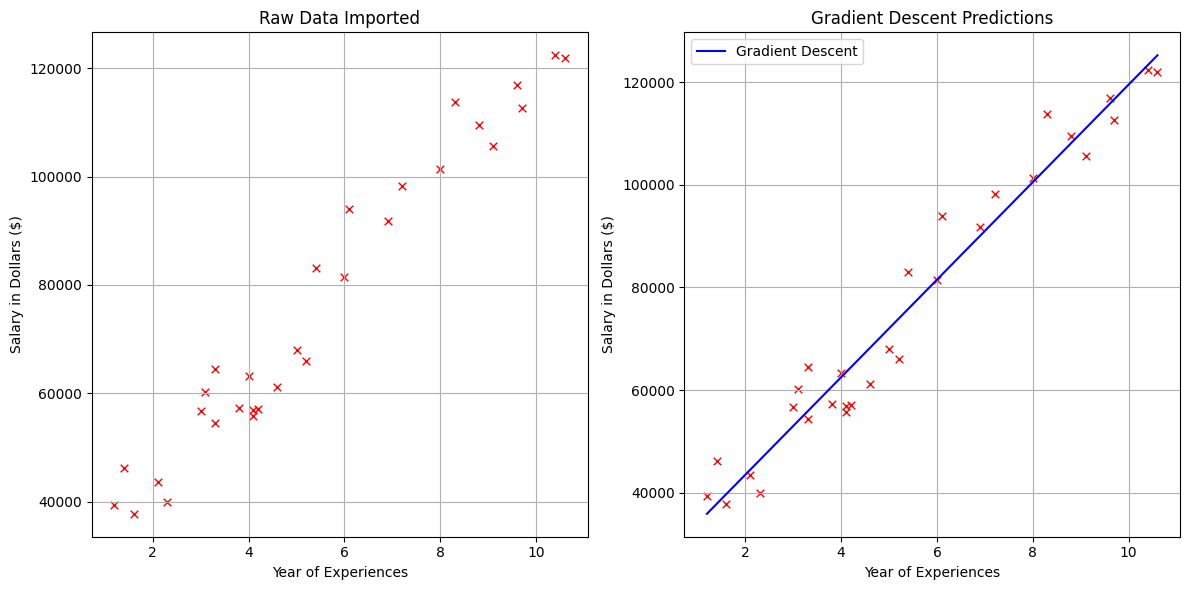

In [43]:
# Fitting Results: GRADIENT DESCENT
print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS GRADIENT DESCENT')
print('-----------------------------------------------------------------')
print("\nFitting: GRADIENT DESCENT")
print("Learning rate (alpha):", alpha)
print("Number of iterations:", num_iters)
print("Fitting parameters:")
print(f"\tIntercept θ_0: {theta_gd[0][0]:.3f}")
print(f"\tSlope θ_1: {theta_gd[1][0]:.3f}")
print(f"Goodness of fit r^2: {r2_gd:.3f}")

# Predictions for 5 and 10 years of experience using Gradient Descent
years_of_experience = [5, 10]
for years in years_of_experience:
    predicted_salary = theta_gd[0][0] + theta_gd[1][0] * years
    print(f"Predicted Salary for {years:.2f} years of experience using Gradient Descent: ${predicted_salary:.2f}")

# Fitting Results: Linear Regression SKLEARN
print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS SKLEARN')
print('-----------------------------------------------------------------')
print("\nFitting: Linear Regression SKLEARN")
print("Fitting parameters:")
print(f"\tIntercept θ_0: {theta_lr[0]:.3f}")
print(f"\tSlope θ_1: {theta_lr[1]:.3f}")
print(f"Goodness of fit r^2: {r2_lr:.3f}")

# Predictions for 5 and 10 years of experience using Scikit-learn Linear Regression
for years in years_of_experience:
    predicted_salary = lr_regr.predict(np.array([[years]]))[0]
    print(f"Predicted Salary for {years:.2f} years of experience using Scikit-learn Linear Regression: ${predicted_salary:.2f}")

# Scatter Plot: Gradient Descent & Scikit-learn Linear Regression
plt.figure(figsize=(12, 6))

# Scatter plot for the raw data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Year of Experiences')
plt.ylabel('Salary in Dollars ($)')
plt.title('Raw Data Imported')
plt.grid(True)

# Scatter plot for Gradient Descent predictions
plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(X[:, 1], y_gd, label='Gradient Descent', color='b')
plt.xlabel('Year of Experiences')
plt.ylabel('Salary in Dollars ($)')
plt.title('Gradient Descent Predictions')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 1 Regularized Linear Regression

# Homework 3.2
Continuing from homework 1, use the ‘ext1data.txt’ dataset from Andrew Ng’s Exercise 1 and perform polynomial linear regression using sklearn library with degree 10 under these 3 approaches:

* Without regularization
* With L1 regularization
* With L2 regularization
* With Elastic-Net regularization

See example code from Kaggle
https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2

Ext1 Dataset (Exercise 1):
https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/tree/master/Exercises

Submit your .ipynb file to show your work

# Homework 3.3

Follow the Kaggle example below, using the same dataset. Determine the best value of λ to use for
Ridge Regression and Lasso Regression for polynomial regression of degree 10.
• Kaggle code: https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2

Submit the Jupyter Notebook .ipynb file to show your work.